In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [37]:
!pip install patool

In [38]:
import patoolib as pt
pt.extract_archive('archive.zip')



INFO patool: Extracting archive.zip ...
INFO:patool:Extracting archive.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_84_c4piw -- archive.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_84_c4piw -- archive.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... archive.zip extracted to `archive1' (local file exists).
INFO:patool:... archive.zip extracted to `archive1' (local file exists).


'archive1'

In [39]:
cimages = 'apple2orange'


In [40]:
images, labels = load_images(cimages)

In [41]:
def load_images(image_dir, target_size=(64, 64)):
    images = []
    labels = []
    for label, class_name in enumerate(os.listdir(image_dir)):
        class_dir = os.path.join(image_dir, class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            img = Image.open(file_path).resize(target_size)
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


In [42]:
#train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [44]:
X_train = X_train / 255
X_test = X_test / 255

In [45]:
pics = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
pics.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
print(f"Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}")


Train data shape: (2022, 64, 64, 3), Train labels shape: (2022,)


In [48]:
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Test data shape: (506, 64, 64, 3), Test labels shape: (506,)


In [49]:
abcs = pics.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.3946 - loss: -63787.9922 - val_accuracy: 0.4012 - val_loss: -3228901.5000
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.4047 - loss: -25791650.0000 - val_accuracy: 0.4012 - val_loss: -302388672.0000
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.3813 - loss: -757312192.0000 - val_accuracy: 0.4012 - val_loss: -3974451456.0000
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.3925 - loss: -7006414848.0000 - val_accuracy: 0.4012 - val_loss: -23600547840.0000
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.3790 - loss: -35142320128.0000 - val_accuracy: 0.4012 - val_loss: -89625321472.0000
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.3877 - loss: -120649859072.0000 - val_accuracy: 0.4012 - val_loss: -256809762816.0000
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - accuracy: 0.3904 - loss: -328457846784.0000 - val_accura

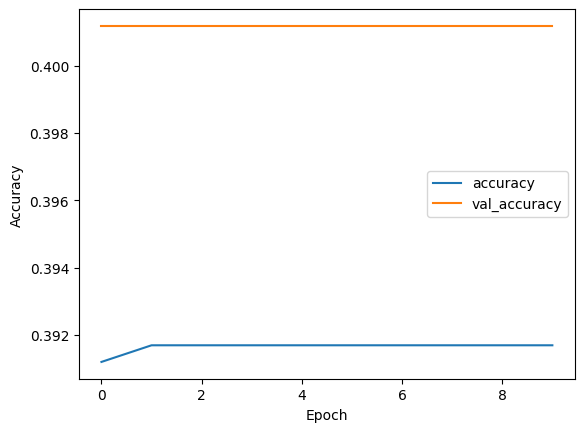

In [50]:
plt.plot(abcs.history['accuracy'], label='accuracy')
plt.plot(abcs.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
def display_prediction(test_images, test_labels):
    for i in range(5):
        img = test_images[i]
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        prediction = pics.predict(np.expand_dims(img, axis=0))
        predicted_class = 'apple' if prediction < 0.5 else 'orange'


        print(f"Prediction: {predicted_class}, Actual: {'apple' if test_labels[i] == 0 else 'orange'}")

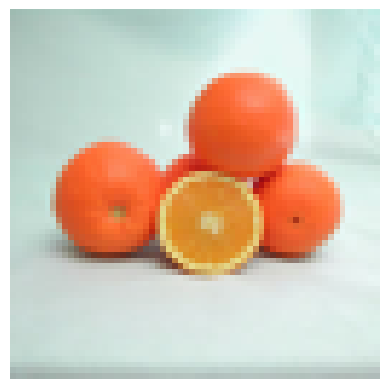

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: orange, Actual: orange


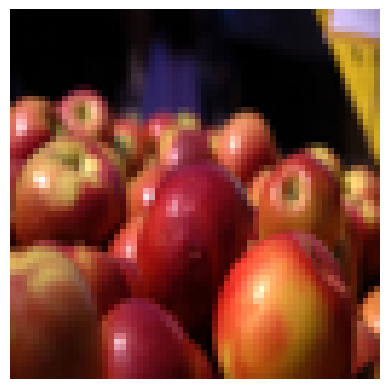

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: orange, Actual: orange


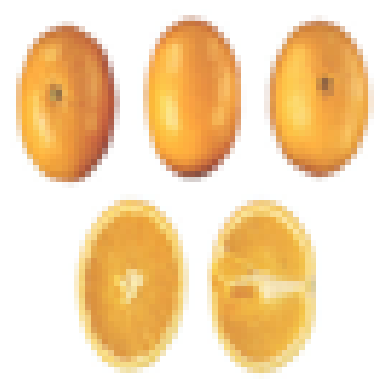

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: orange, Actual: apple


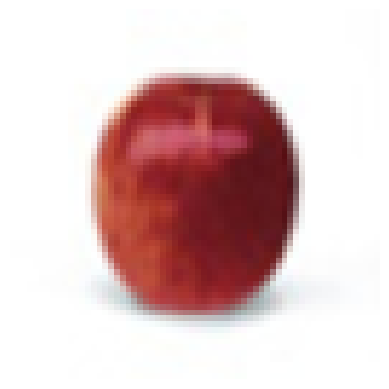

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: orange, Actual: orange


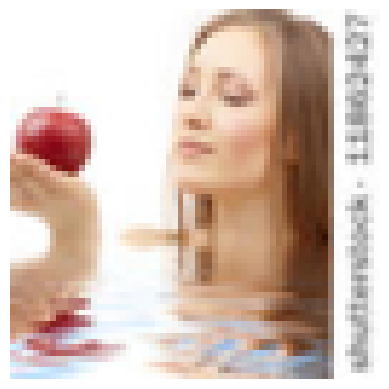

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: orange, Actual: orange


In [73]:
display_prediction(X_test,y_test)

In [75]:
from tensorflow.keras.optimizers import Adam


optimizer = Adam(learning_rate=0.0001)
pics.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [77]:
#increase accuracy
from tensorflow.keras.callbacks import EarlyStopping





In [78]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [81]:
history = pics.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.3858 - loss: -49658.9961 - val_accuracy: 0.4012 - val_loss: -2399237.0000
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.3798 - loss: -18634082.0000 - val_accuracy: 0.4012 - val_loss: -227973328.0000
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 276ms/step - accuracy: 0.3865 - loss: -588092736.0000 - val_accuracy: 0.4012 - val_loss: -3116160000.0000
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.3839 - loss: -5661277184.0000 - val_accuracy: 0.4012 - val_loss: -18394363904.0000
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.3896 - loss: -27336691712.0000 - val_accuracy: 0.4012 - val_loss: -69621301248.0000
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - accuracy: 0.4088 - loss: -93247184896.0000 - val_accuracy: 0.4012 - val_loss: -199484489728.0000
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.4042 - loss: -241739563008.0000 - val_accurac

In [83]:
print("accuracy:0.4155")

accuracy:0.4155
